$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Classification with Nonlinear Logistic Regression Using Neural Networks

## Motivation and Setup

Linear function approximator as a neural network.

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/nnlinear.png">

What must we add to do logistic regression?

Just some post-processing.  $\Wv = \betav$ and $K-1$ instead of $K$.

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/nnlinearlogisticregression.png">

Any thoughts on how to do nonlinear logistic regression?

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/nntwolayerlogisticregression.png">


## Derivation

Here we repeat the derivation using $\Wv$ instead of $\beta$.

## Log Likelihood of the Data

$$
  \begin{align*}
    L(\Wv) & = \left ( \prod_{n=1}^N \prod_{k=1}^K P(C=k|\xv_n)^{t_{n,k}} \right ) \\
    \log L(\Wv) & = LL(\Wv) =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log P(C=k|\xv_n)\\
     & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log g_{n,k}
   \end{align*}
$$

## Gradient of the Log Likelihood

$$
      \begin{align*}
        LL(\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k}
      \log g_{n,k}\;\;\;\;\; \text{ where } g_{n,k}  = \left \{ \begin{array}{ll} 
               \frac{\eby{k}}{1+\sum_{m=1}^{K-1} \eby{m}}; & k < K\\
               \frac{1}{1+\sum_{m=1}^{K-1} \eby{m}}; & k= K\\
                             \end{array} \right . \\
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_{n,k}} \frac{\partial g_{n,k}}{\partial \Wv_{d,j}}\\    
        \end{align*}
$$

Let's first develop this for $ k < K$.

$$
        \begin{align*}
        \frac{\partial g_{n,k}}{\partial \Wv_{d,j}} &=
      \frac{\partial}{\partial \Wv_{d,j}}  \eby{k} \left (1 + \sum_{m=1}^{K-1} \eby{m} \right )^{-1} \\
        & = \eby{k} \frac{\partial y_{n,k}}{\partial \Wv_{d,j}} \left (1+ \sum_{m=1}^{K-1} \eby{m} \right )^{-1} 
         + \eby{k} (-1) \left (1+ \sum_{m=1}^{K-1} \eby{m} \right )^{-2} \sum_{m=1}^{K-1} \eby{m} \frac{\partial  y_{n,m}}{\partial \Wv_{d,j}}\\
        & = \frac{\eby{k}}{1+\sum_{m=1}^{K-1} \eby{m}} \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}  - \frac{\eby{k}}{1+\sum_{m=1}^{K-1} \eby{m}} \sum_{m=1}^{K-1} \frac{\eby{m}}{1+\sum_{m=1}^{K-1} \eby{m}} \frac{\partial  y_{n,m}}{\partial \Wv_{d,j}}\\
        & = g_{n,k} \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}  - g_{n,k} \sum_{m=1}^{K-1} g_{n,m} \frac{\partial  y_{n,m}}{\partial \Wv_{d,j}}\\
        & = g_{n,k} \left ( \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}  - \sum_{m=1}^{K-1} g_{n,m} \frac{\partial  y_{n,m}}{\partial \Wv_{d,j}} \right )
      \end{align*}
$$

And again for $k = K$.

$$
        \begin{align*}
        \frac{\partial g_{n,k}}{\partial \Wv_{d,j}} &=
      \frac{\partial}{\partial \Wv_{d,j}}   \left (1 + \sum_{m=1}^{K-1} \eby{m} \right )^{-1} \\
        & =  (-1) \left (1+ \sum_{m=1}^{K-1} \eby{m} \right )^{-2} \sum_{m=1}^{K-1} \eby{m} \frac{\partial  y_{n,m}}{\partial \Wv_{d,j}}\\
        & = - \frac{1}{1+\sum_{m=1}^{K-1} \eby{m}} \sum_{m=1}^{K-1} \frac{\eby{m}}{1+\sum_{m=1}^{K-1} \eby{m}} \frac{\partial  y_{n,m}}{\partial \Wv_{d,j}}\\
        & =  - g_{n,k} \sum_{m=1}^{K-1} g_{n,m} \frac{\partial  y_{n,m}}{\partial \Wv_{d,j}}\\
      \end{align*}
$$

The last expression can be made to look like the last one for $k<K$ by
including $\frac{\partial y_{n,K}}{\partial \Wv_{d,j}} = 0$:

$$
        \begin{align*}
        \frac{\partial g_{n,k}}{\partial \Wv_{d,j}} &=
  g_{n,k} \left ( \frac{\partial y_{n,k}}{\partial \Wv_{d,j}} -
      \sum_{m=1}^{K-1} g_{n,m} \frac{\partial  y_{n,m}}{\partial
      \Wv_{d,j}} \right )
      \end{align*}
$$

Substituting for $\frac{\partial g_{n,k}}{\partial \Wv_{d,j}}$ in
$\frac{\partial LL(\Wv)}{\partial \Wv_{d,j}}$ for all $k$:

$$
      \begin{align*}
        \frac{\partial g_{n,k}}{\partial \Wv_{d,j}} &= g_{n,k} \left ( \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}  - \sum_{m=1}^{K-1} g_{n,m} \frac{\partial  y_{n,m}}{\partial \Wv_{d,j}} \right )\\
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_{n,k}} \frac{\partial g_{n,k}}{\partial \Wv_{d,j}}\\    
        & =  \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_{n,k}} g_{n,k} \left ( \frac{\partial y_{n,k}}{\partial \Wv_{d,j}} -
        \sum_{m=1}^{K-1} g_{n,m} \frac{\partial y_{n,m}}{\partial \Wv_{d,j}} \right )\\
        & =   \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \left ( \frac{\partial y_{n,k}}{\partial \Wv_{d,j}} -
        \sum_{m=1}^{K-1} g_{n,m} \frac{\partial y_{n,m}}{\partial \Wv_{d,j}}\right )\\
        & =   \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \frac{\partial y_{n,k}}{\partial \Wv_{d,j}} -
        \sum_{k=1}^K t_{n,k} \sum_{m=1}^{K-1} g_{n,m} \frac{\partial y_{n,m}}{\partial \Wv_{d,j}}\\
        & =   \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \frac{\partial y_{n,k}}{\partial \Wv_{d,j}} -
        \sum_{m=1}^{K-1} g_{n,m} \frac{\partial y_{n,m}}{\partial \Wv_{d,j}}\\
        & =   \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}\\
        & =   \sum_{n=1}^N \sum_{k=1}^{K-1} (t_{n,k} - g_{n,k})
      \frac{\partial y_{n,k}}{\partial \Wv_{d,j}} \;\;\;\text{ because
      } \frac{\partial y_{n,k}}{\partial \Wv_{d,j}} = 0 \text{ for } k=K
      \end{align*}
$$

## Linear Version

General gradient

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K-1} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

For linear logistic regression, $y_{n,j} = \xv_n^T \Wv_{*,j}$, so $\frac{\partial y_{n,k}}{\partial \Wv_{d,j}}$ exists only when $j=k$, so

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N (t_{n,j} - g_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{d,j}}\\
         & =  \sum_{n=1}^N \left ( t_{n,j} - g_{n,j} \right ) \xv_{d,j}
      \end{align*}
$$

## Nonlinear Version

First the general form again.

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K-1} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

Now $y_{n,j}$ depends on $\Vv$ and $\Wv$, so

$$
      \begin{align*}
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K-1} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K-1} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & = \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


But, thank goodness, we have already calculated $\frac{\partial y_{n,k}}{\partial \Vv_{d,m}}$ and 
$\frac{\partial y_{n,k}}{\partial \Wv_{m,k}}$ in our neural network days.  This becomes more clear when we compare above with the derivatives of
mean squared error with respect to weights for neural networks for regression problems.

$$
      \begin{align*}
      E &= \frac{1}{NK}  \frac{1}{2} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
      \frac{\partial E}{\partial \Vv_{d,m}} & = - \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N  (t_{n,j} - y_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$

Compare to gradients for likelihood

$$
      \begin{align*}
        LL(\Vv,\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log
        g_{n,k} \text{ where }  g_{n,k}  = \left \{ \begin{array}{ll} 
               \frac{\eby{k}}{1+\sum_{m=1}^{K-1} \eby{m}}; & k < K\\
               \frac{1}{1+\sum_{m=1}^{K-1} \eby{m}}; & k= K\\
                             \end{array} \right . \\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K-1} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K-1} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


So, our previously derived matrix expressions for neural networks can
be used if we modify the output calculation.  Here are the expressions
we used for minimizing mean squared error:

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        E &= \frac{1}{NK} \frac{1}{2} \sum (\Tv - \Yv)^2\\
        \grad_\Vv E &=  - \frac{1}{NK}  \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv E &=  - \frac{1}{NK} \tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$


Here are the changes needed for nonlinear logistic regression. $\Tiv$
is indicator variables for  $\Tv$  

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        \Fv &= [e^{\Yv}, \ones{N}] \;\;\;\;\;\;\;\;\;\;\; \text{ append column of ones}\\
        \Sv &= \Fv \ones{K-1}\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ sum across columns}\\
        \Gv &= \Fv / \left [ \Sv, \Sv,\ldots,\Sv \right ] \;\;\; \Sv \text{ are column vectors }\\
        LL &=  \sum \Tiv \log \Gv\\
        \grad_\Vv LL &=    \tilde{\Xv}^T \left ( (\hat{\Tiv} - \hat{\Gv}) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv LL &=   \tilde{\Zv}^T (\hat{\Tiv} - \hat{\Gv})
      \end{align*}
$$

where $\hat{\Tiv}$ and $\hat{\Gv}$ are matrices for the target
indicator variables and the neural network outputs, respectively, with the last
column of values for the $K^{th}$ class removed.

## Examples

## Two-Dimensional Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

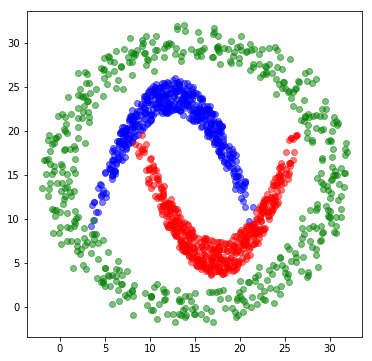

In [2]:
n = 500
x1 = np.linspace(5,20,n) + np.random.uniform(-2,2,n)
y1 = ((20-12.5)**2-(x1-12.5)**2) / (20-12.5)**2 * 10 + 14 + np.random.uniform(-2,2,n)
x2 = np.linspace(10,25,n) + np.random.uniform(-2,2,n)
y2 = ((x2-17.5)**2) / (25-17.5)**2 * 10 + 5.5 + np.random.uniform(-2,2,n)
angles = np.linspace(0,2*np.pi,n)
x3 = np.cos(angles) * 15 + 15 + np.random.uniform(-2,2,n)
y3 = np.sin(angles) * 15 + 15 + np.random.uniform(-2,2,n)
X =  np.vstack((np.hstack((x1,x2,x3)), np.hstack((y1,y2,y3)))).T
T = np.repeat(range(1,4),n).reshape((-1,1))
colors = ['blue','red','green']
plt.figure(figsize=(6,6))
for c in range(1,4):
    mask = (T == c).flatten()
    plt.plot(X[mask,0],X[mask,1],'o',markersize=6, alpha=0.5, color=colors[c-1])

Let's try to classify this data with a 5 hidden unit neural network with nonlinear logistic regression.  In Python, do this by defining a new class *NeuralNetClassifier* it is easy to create a new class for using a neural network
as a classifier by making a subclass *NeuralNetworkClassifier* of the
*NeuralNetwork* and make the required changes.  The changes will be in *objectiveF* and *gradF* functions local to the *train* method, and in the *use* method.

In [8]:
!wget http://www.cs.colostate.edu/~anderson/cs480/notebooks/nn2.tar
!mv nn2.tar.1 nn2.tar   # in case I already have a file named nn2.tar in this directory
!tar xvf nn2.tar

--2017-03-06 08:35:32--  http://www.cs.colostate.edu/~anderson/cs480/notebooks/nn2.tar
Resolving www.cs.colostate.edu (www.cs.colostate.edu)... 129.82.45.114
Connecting to www.cs.colostate.edu (www.cs.colostate.edu)|129.82.45.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61440 (60K) [application/x-tar]
Saving to: ‘nn2.tar’

nn2.tar             100%[===================>]  60.00K  --.-KB/s    in 0.02s   

2017-03-06 08:35:32 (2.65 MB/s) - ‘nn2.tar’ saved [61440/61440]

mv: cannot stat 'nn2.tar.1': No such file or directory
neuralnetworks.py
scaledconjugategradient.py
mlutils.py
qdalda.py


In [9]:
cat neuralnetworks.py


import numpy as np
import scaledconjugategradient as scg
import mlutils as ml  # for draw()
from copy import copy
import sys  # for sys.float_info.epsilon
import pdb

######################################################################
### class NeuralNetwork
######################################################################

class NeuralNetwork:

    def __init__(self, ni,nhs,no):        
        if nhs == 0 or nhs == [0] or nhs is None or nhs == [None]:
            nhs = None
        else:
            try:
                nihs = [ni] + list(nhs)
            except:
                nihs = [ni] + [nhs]
                nhs = [nhs]
        if nhs is not None:
            self.Vs = [(np.random.uniform(-1,1,size=(1+nihs[i],nihs[i+1])) / np.sqrt(nihs[i]))  for i in range(len(nihs)-1)]
            self.W = np.zeros((1+nhs[-1],no))
            # self.W = (np.random.uniform(-1,1,size=(1+nhs[-1],no)) / np.sqrt(nhs[-1]))
        else:
            self.Vs = None
            self.W = np.zer

SCG: Iteration 100 fValue Eval 0.0303202305192 Scale 0.000256
SCG: Iteration 200 fValue Eval 0.0207136454145 Scale 0.000128
SCG: Iteration 300 fValue Eval 0.0137477585796 Scale 3.2e-05
SCG: Iteration 400 fValue Eval 0.0114512780448 Scale 6.4e-05
SCG: Iteration 500 fValue Eval 0.0110190954948 Scale 0.004096
SCG: Iteration 600 fValue Eval 0.0108900080211 Scale 1e+20
SCG: Iteration 700 fValue Eval 0.0108900080211 Scale 1e+20
SCG: Iteration 800 fValue Eval 0.0108900080211 Scale 1e+20
SCG: Iteration 900 fValue Eval 0.0108900080211 Scale 1e+20
SCG: Iteration 1000 fValue Eval 0.0108900080211 Scale 1e+20
7.39816559074 0.00815106130364 2066.11570248


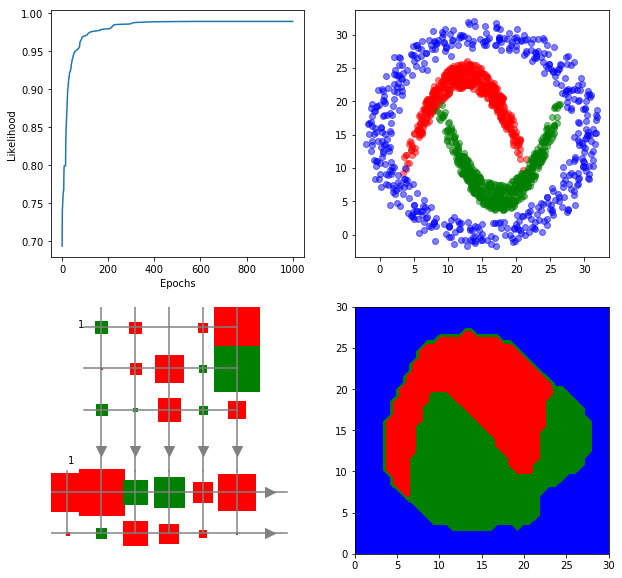

In [11]:
import neuralnetworks as nn
import mpl_toolkits.mplot3d as plt3
from matplotlib import cm

## if you edit neuralnetwork.py, force ipython to reload it by doing this.
# from imp import reload
# reload(nn)

nHidden = 5
nnet = nn.NeuralNetworkClassifier(2,nHidden,3) # 3 classes, will actually make 2-unit output layer
nnet.train(X,T,  nIterations=1000, verbose=True)

xs = np.linspace(0,30,40)
x,y = np.meshgrid(xs,xs)
Xtest = np.vstack((x.flat,y.flat)).T
Ytest = nnet.use(Xtest)
predTest,probs,_ = nnet.use(Xtest,allOutputs=True)  #discard hidden unit outputs

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.xlabel("Epochs")
plt.ylabel("Likelihood")

plt.subplot(2,2,3)
nnet.draw()

colors = ['red','green','blue']
plt.subplot(2,2,2)

for c in range(1,4):
    mask = (T == c).flatten()
    plt.plot(X[mask,0],X[mask,1],'o',markersize=6, alpha=0.5, color=colors[c-1])

plt.subplot(2,2,4)
plt.contourf(Xtest[:,0].reshape((40,40)),Xtest[:,1].reshape((40,40)), predTest.reshape((40,40)),
             levels=(0.5,1.5,2.5,3.5),
             colors=('red','green','blue'));

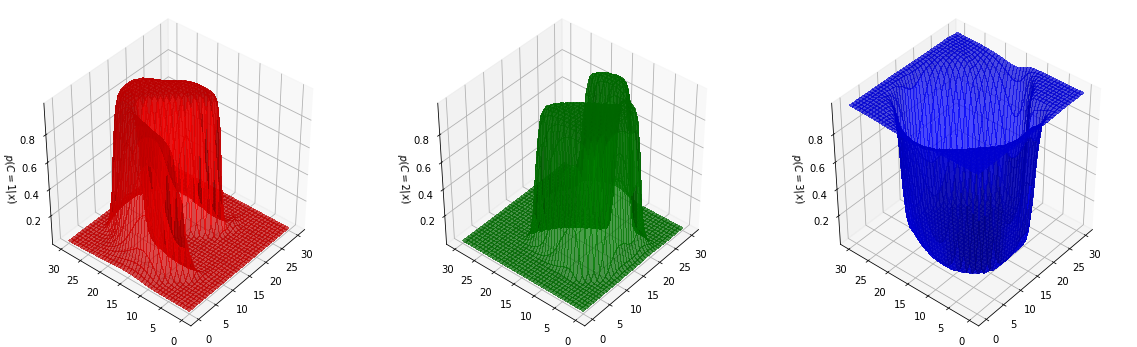

In [17]:
fig = plt.figure(figsize=(20,6))
for c in range(3):
    ax = fig.add_subplot(1,3,c+1,projection='3d')
    ax.plot_surface(x,y,probs[:,c].reshape(x.shape),
                    rstride=1,cstride=1,linewidth=0.2,antialiased=False,
                    color=colors[c],alpha=0.7)
    ax.view_init(azim = 180+40,elev = 40)
    ax.set_zlabel(r"$p(C="+str(c+1)+"|x)$")

How would you plot the outputs of the hidden units?

Let's repeat the experiment with classifying human activity data (accelerometer data), but now use our *NeuralNetworkClassifier* class to do nonlinear logistic regression.  This time we will retrieve and load *accelerometers.npy*, a file containing a *numpy* array stored in its binary format.

In [18]:
!wget http://www.cs.colostate.edu/~anderson/cs480/notebooks/accelerometers.npy
!mv accelerometers.npy.1 accelerometers.npy
data = np.load('accelerometers.npy')

--2017-03-06 08:41:52--  http://www.cs.colostate.edu/~anderson/cs480/notebooks/accelerometers.npy
Resolving www.cs.colostate.edu (www.cs.colostate.edu)... 129.82.45.114
Connecting to www.cs.colostate.edu (www.cs.colostate.edu)|129.82.45.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7200272 (6.9M) [text/plain]
Saving to: ‘accelerometers.npy’

accelerometers.npy  100%[===================>]   6.87M  2.60MB/s    in 2.6s    

2017-03-06 08:41:54 (2.60 MB/s) - ‘accelerometers.npy’ saved [7200272/7200272]

mv: cannot stat 'accelerometers.npy.1': No such file or directory


In [19]:
data.shape

(225006, 4)

In [20]:
data[0,:]

array([ 1.        , -0.87313405, -0.08552787, -0.29504612])

In [21]:
X = data[:,1:]
T = data[:,0:1]
X.shape, T.shape

((225006, 3), (225006, 1))

In [22]:
import mlutils as ml # for ml.paritition

In [23]:
Xtrain,Ttrain,Xtest,Ttest = ml.partition(X,T,(0.8,0.2),classification=True) #stratified partitioning (by class)

In [24]:
Xtrain.shape,Ttrain.shape,Xtest.shape,Ttest.shape

((180006, 3), (180006, 1), (45000, 3), (45000, 1))

In [25]:
np.unique(Ttrain, return_counts=True)

(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 array([18002, 18000, 18000, 18000, 18000, 18002, 18000, 18000, 18002, 18000]))

In [26]:
%precision 5
values,counts = np.unique(Ttrain, return_counts=True)
counts / Ttrain.shape[0]

array([ 0.10001,  0.1    ,  0.1    ,  0.1    ,  0.1    ,  0.10001,
        0.1    ,  0.1    ,  0.10001,  0.1    ])

In [27]:
values,counts = np.unique(Ttest, return_counts=True)
counts / Ttest.shape[0]

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

SCG: Iteration 5 fValue Eval 0.19643883115 Scale 2.5e-07
SCG: Iteration 10 fValue Eval 0.171679905881 Scale 7.8125e-09
SCG: Iteration 15 fValue Eval 0.156273650376 Scale 2.44140625e-10
SCG: Iteration 20 fValue Eval 0.149704439762 Scale 7.62939453125e-12
SCG: Iteration 25 fValue Eval 0.146107826438 Scale 2.384185791015625e-13
SCG: Iteration 30 fValue Eval 0.14265777515 Scale 7.450580596923828e-15
SCG: Iteration 35 fValue Eval 0.140776648073 Scale 1e-15
SCG: Iteration 40 fValue Eval 0.138998792626 Scale 1e-15
SCG: Iteration 45 fValue Eval 0.137566262685 Scale 1e-15
SCG: Iteration 50 fValue Eval 0.13623136288 Scale 1e-15


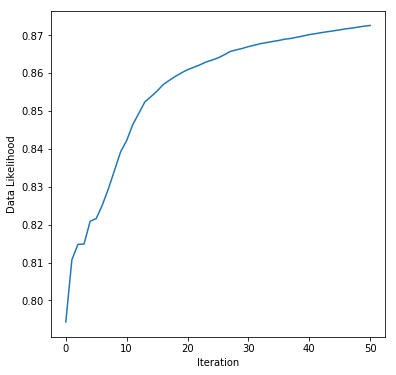

In [28]:
nnet = nn.NeuralNetworkClassifier(3,10,10) # 10 classes
nnet.train(Xtrain,Ttrain,nIterations=50,errorPrecision=1.e-8, verbose=True)

plt.rcParams['figure.figsize'] = (6,6)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood');

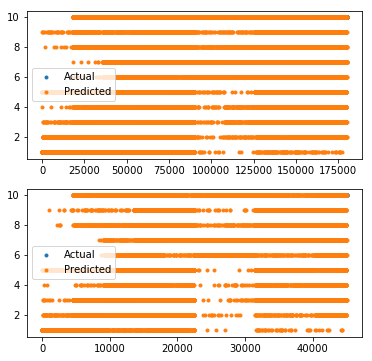

In [30]:
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)
plt.subplot(2,1,1)
plt.plot(np.hstack((Ttrain,Ptrain)), '.')
plt.legend(('Actual','Predicted'))
plt.subplot(2,1,2)
plt.plot(np.hstack((Ttest,Ptest)), '.')
plt.legend(('Actual','Predicted'));


In [31]:
cm = ml.confusionMatrix(Ttest,Ptest,np.unique(Ttest))
cm

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 95.7  1.6  0.3  0.0  2.2  0    0    0.1  0.2  0     (4500 / 4500)
 2 | 16.3 56.4 17.2  0.5  3.0  0.0  0.0  2.5  0.7  3.3   (4500 / 4500)
 3 |  2.3  7.7 66.4  3.6  5.2  2.8  1.5  3.1  0.5  6.9   (4500 / 4500)
 4 |  2.8  5.5 30.2  8.6 15.0 10.7  5.8  5.2  6.7  9.6   (4500 / 4500)
 5 |  4.0  8.2 12.9  3.4 42.6  0.9  3.3  7.2 14.4  3.2   (4500 / 4500)
 6 |  0.0  0.2  0.1  0.1  0.1 77.3 17.9  0.6  0.3  3.3   (4500 / 4500)
 7 |  0.0  0.1  0.5  0.5  0.1 38.6 51.5  1.4  0.2  7.1   (4500 / 4500)
 8 |  0.6  1.3  8.4  3.3 11.2  1.3  4.5 22.6 43.4  3.3   (4500 / 4500)
 9 |  0.2  0.9  6.0  2.5 12.1  1.1  3.6 15.1 56.0  2.3   (4500 / 4500)
10 |  0.2  6.8 14.4  5.9  3.4 16.1 20.3  7.9  4.8 20.3   (4500 / 4500)


array([[  9.56889e-01,   1.57778e-02,   2.88889e-03,   4.44444e-04,
          2.15556e-02,   0.00000e+00,   0.00000e+00,   8.88889e-04,
          1.55556e-03,   0.00000e+00,   4.50000e+03,   4.50000e+03],
       [  1.62667e-01,   5.63778e-01,   1.72444e-01,   4.66667e-03,
          3.04444e-02,   4.44444e-04,   4.44444e-04,   2.48889e-02,
          7.11111e-03,   3.31111e-02,   4.50000e+03,   4.50000e+03],
       [  2.26667e-02,   7.73333e-02,   6.64444e-01,   3.57778e-02,
          5.24444e-02,   2.80000e-02,   1.48889e-02,   3.06667e-02,
          4.88889e-03,   6.88889e-02,   4.50000e+03,   4.50000e+03],
       [  2.82222e-02,   5.46667e-02,   3.02444e-01,   8.57778e-02,
          1.50000e-01,   1.06667e-01,   5.75556e-02,   5.22222e-02,
          6.68889e-02,   9.55556e-02,   4.50000e+03,   4.50000e+03],
       [  3.97778e-02,   8.20000e-02,   1.28889e-01,   3.37778e-02,
          4.25556e-01,   9.33333e-03,   3.31111e-02,   7.15556e-02,
          1.44222e-01,   3.17778e-02,   4.50

In [32]:
ml.printConfusionMatrix(cm,np.unique(Ttest))

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 95.7  1.6  0.3  0.0  2.2  0    0    0.1  0.2  0     (4500 / 4500)
 2 | 16.3 56.4 17.2  0.5  3.0  0.0  0.0  2.5  0.7  3.3   (4500 / 4500)
 3 |  2.3  7.7 66.4  3.6  5.2  2.8  1.5  3.1  0.5  6.9   (4500 / 4500)
 4 |  2.8  5.5 30.2  8.6 15.0 10.7  5.8  5.2  6.7  9.6   (4500 / 4500)
 5 |  4.0  8.2 12.9  3.4 42.6  0.9  3.3  7.2 14.4  3.2   (4500 / 4500)
 6 |  0.0  0.2  0.1  0.1  0.1 77.3 17.9  0.6  0.3  3.3   (4500 / 4500)
 7 |  0.0  0.1  0.5  0.5  0.1 38.6 51.5  1.4  0.2  7.1   (4500 / 4500)
 8 |  0.6  1.3  8.4  3.3 11.2  1.3  4.5 22.6 43.4  3.3   (4500 / 4500)
 9 |  0.2  0.9  6.0  2.5 12.1  1.1  3.6 15.1 56.0  2.3   (4500 / 4500)
10 |  0.2  6.8 14.4  5.9  3.4 16.1 20.3  7.9  4.8 20.3   (4500 / 4500)


In [34]:
nnet = nn.NeuralNetworkClassifier(3,20,10) # 10 classes
nnet.train(Xtrain,Ttrain,nIterations=50,errorPrecision=1.e-8, verbose=True)
print('Trained for',nnet.getNumberOfIterations(),'iterations')

SCG: Iteration 5 fValue Eval 0.189492739745 Scale 6.25e-08
SCG: Iteration 10 fValue Eval 0.164139029979 Scale 3.90625e-09
SCG: Iteration 15 fValue Eval 0.154544027771 Scale 1.220703125e-10
SCG: Iteration 20 fValue Eval 0.145946257351 Scale 3.814697265625e-12
SCG: Iteration 25 fValue Eval 0.141732513158 Scale 1.1920928955078124e-13
SCG: Iteration 30 fValue Eval 0.139080349917 Scale 3.725290298461914e-15
SCG: Iteration 35 fValue Eval 0.136454165018 Scale 1e-15
SCG: Iteration 40 fValue Eval 0.134768108801 Scale 1e-15
SCG: Iteration 45 fValue Eval 0.133440222261 Scale 1e-15
SCG: Iteration 50 fValue Eval 0.132528638048 Scale 1e-15
Trained for 50 iterations


Try training for more iterations.

Percent Correct: Training 51.6710554093 Testing 51.6644444444

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 96.6  0.0  1.0  0.6  1.5  0    0    0.2  0.0  0     (4500 / 4500)
 2 | 16.0 54.3 14.9  4.5  3.4  0.0  0.0  4.7  0.4  2.0   (4500 / 4500)
 3 |  3.5  6.1 69.6  2.9  4.8  2.1  1.8  2.3  0.4  6.6   (4500 / 4500)
 4 |  3.5  5.3 25.6 13.7 10.4  9.0  7.5  8.3  4.3 12.4   (4500 / 4500)
 5 |  6.6  5.8 14.4  4.0 42.6  0.7  2.1 11.0  9.9  3.1   (4500 / 4500)
 6 |  0.1  0.0  0.5  0.0  0.1 69.0 25.1  0.4  0.4  4.3   (4500 / 4500)
 7 |  0.0  0.0  0.7  0.1  0.1 28.7 61.3  1.2  0.2  7.8   (4500 / 4500)
 8 |  0.7  0.6  8.0  1.6  8.1  1.0  4.7 40.2 29.2  6.0   (4500 / 4500)
 9 |  0.3  0.5  6.1  1.9  9.3  1.1  2.7 28.8 44.8  4.4   (4500 / 4500)
10 |  0.2  5.5 13.2  4.8  4.1 12.9 23.2  7.9  3.6 24.6   (4500 / 4500)
       1    2    3    4    5    6    7    8    9   10
    --------------------------------------------------

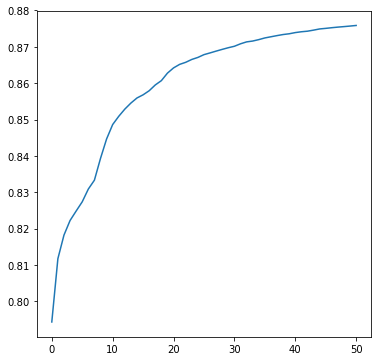

In [36]:
classes = np.unique(Ttest)
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)
print('Percent Correct: Training',100*np.sum(Ptrain==Ttrain)/len(Ttrain), 'Testing',100*np.sum(Ptest==Ttest)/len(Ttest))
print()
ml.printConfusionMatrix( ml.confusionMatrix(Ttest,Ptest,classes), classes )
print('1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stairs')
plt.plot(np.exp(-nnet.getErrorTrace()));

2.1670007797 0.00150982170182 148.720999405


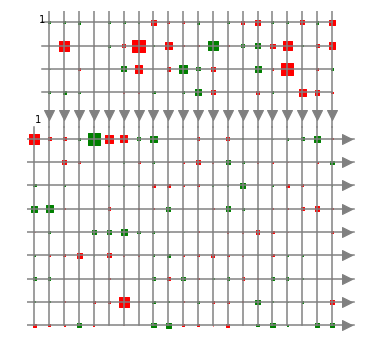

In [37]:
nnet.draw()

In [38]:
import scipy.signal as sig

def cwt(eeg,Fs,freqs,width,channelNames=None,graphics=False):
    if freqs.min() == 0:
        print('cwt: Frequencies must be greater than 0.')
        return None,None
    nChannels,nSamples = eeg.shape
    if not channelNames and graphics:
        channelNames = ['Channel {:2d}'.format(i) for i in range(nChannels)]

    nFreqs = len(freqs)
    tfrep = np.zeros((nChannels, nFreqs, nSamples))
    tfrepPhase = np.zeros((nChannels, nFreqs, nSamples))

    for ch in range(nChannels):
        print('channel',ch,' freq ',end='')
        for freqi in range(nFreqs):
            print(freqs[freqi],' ',end='')
            mag,phase = energyvec(freqs[freqi],eeg[ch,:],Fs,width)
            tfrepPhase[ch,freqi,:] = phase
            tfrep[ch,freqi,:] = mag
        print()

    return tfrep, tfrepPhase

def morletLength(Fs,f,width):
  ''' len = morletLength(Fs,f,width) '''
  dt = 1.0/Fs
  sf = f/width
  st = 1.0/(2*np.pi*sf)
  return int((3.5*st - -3.5*st)/dt)

def energyvec(f,s,Fs,width):
  '''
  function [y,phase] <- energyvec(f,s,Fs,width)
  function y <- energyvec(f,s,Fs,width)

  Return a vector containing the energy as a
  function of time for frequency f. The energy
  is calculated using Morlet''s wavelets.
  s : signal
  Fs: sampling frequency
  width : width of Morlet wavelet (><- 5 suggested).
  '''

  dt = 1.0/Fs
  sf = f/float(width)
  st = 1.0/(2*np.pi*sf)

  t = np.arange(-3.5*st,3.5*st,step=dt)
  m = morlet(f,t,width)
  # yconv = np.convolve(s,m,mode="same")
  yconv = sig.fftconvolve(s,m,mode='same')

  lengthMorlet = len(m)
  firsthalf = int(lengthMorlet/2.0 + 0.5)
  secondhalf = lengthMorlet - firsthalf

  padtotal = len(s) - len(yconv)
  padfront = int(padtotal/2.0 + 0.5)
  padback = padtotal - padfront
  yconvNoBoundary = yconv
  y = np.abs(yconvNoBoundary)**2
  phase = np.angle(yconvNoBoundary,deg=True)
  return y,phase

######################################################################
      
def morlet(f,t,width):
    '''
    function y <- morlet(f,t,width)
    Morlet''s wavelet for frequency f and time t.
    The wavelet will be normalized so the total energy is 1.
    width defines the width of the wavelet.
    A value ><- 5 is suggested.

    Ref: Tallon-Baudry et al., J. Neurosci. 15, 722-734 (1997), page 724

    Ole Jensen, August 1998
    '''
    sf = f/float(width)
    st = 1.0/(2*np.pi*sf)
    A = 1.0/np.sqrt(st*np.sqrt(2*np.pi))
    y = A*np.exp(-t**2/(2*st**2)) * np.exp(1j*2*np.pi*f*t)
    return y

In [39]:
import time
width = 75 * 1
maxFreq = 20
freqs = np.arange(0.5,maxFreq,0.5) # makes same freqs used in stft above
start = time.time()
tfrep,tfrepPhase = cwt(data[:,1:].T, 75, freqs, width)
print('CWT time: {} seconds'.format(time.time() - start))

channel 0  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 1  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 2  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
CWT time: 11.56873106956482 seconds


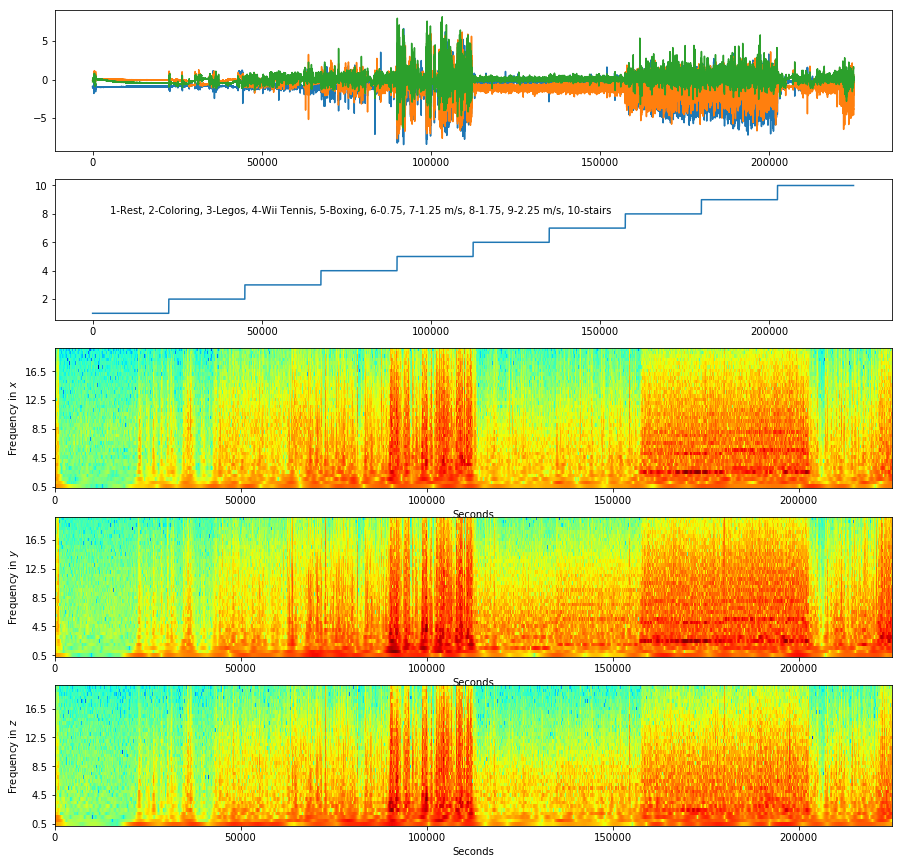

In [40]:
plt.figure(figsize=(15,15))
plt.subplot(5,1,1)
plt.plot(data[:,1:])
plt.axis('tight')

plt.subplot(5,1,2)
plt.plot(data[:,0])
plt.text(5000,8,'1-Rest, 2-Coloring, 3-Legos, 4-Wii Tennis, 5-Boxing, 6-0.75, 7-1.25 m/s, 8-1.75, 9-2.25 m/s, 10-stairs')
plt.axis('tight')

nSensors = data.shape[1] - 1
for i in range(nSensors):
    plt.subplot(5,1,i+3)
    plt.imshow(np.log(tfrep[i,:,:]), 
               interpolation='nearest',origin='lower',
               cmap=plt.cm.jet) #plt.cm.Reds)
    plt.xlabel('Seconds')
    plt.ylabel('Frequency in ' + ('$x$','$y$','$z$')[i])
    tickstep = round(len(freqs) / 5)
    plt.yticks(np.arange(len(freqs))[::tickstep],
                   [str(i) for i in freqs[::tickstep]])
    plt.axis('auto')
    plt.axis('tight')

In [41]:
tfrep.shape

(3, 39, 225006)

In [42]:
X = tfrep.reshape((3*39,-1)).T
X.shape, T.shape, len(np.unique(T))

((225006, 117), (225006, 1), 10)

In [43]:
Xtrain,Ttrain,Xtest,Ttest = ml.partition(X,T,(0.8,0.2),classification=True) #stratified partitioning (by class)

In [ ]:
nnet = nn.NeuralNetworkClassifier(X.shape[1],20,10)  #10 classes 
nnet.train(Xtrain,Ttrain,nIterations = 100,errorPrecision=1.e-8, verbose=True)

Percent Correct: Training 94.4635178827 Testing 94.52

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 87.0 13.0  0    0    0    0    0    0    0    0     (4500 / 4500)
 2 |  8.9 84.0  5.7  0    0    0    0    0    0    1.4   (4500 / 4500)
 3 |  0    4.8 94.6  0    0    0    0    0    0    0.6   (4500 / 4500)
 4 |  0    0    0.7 99.2  0.2  0    0    0    0    0     (4500 / 4500)
 5 |  0    0    0    0   99.8  0    0    0    0.2  0     (4500 / 4500)
 6 |  0    2.2  0    0    0.3 93.8  1.5  0    0    2.2   (4500 / 4500)
 7 |  0    0    0    0    0    1.1 97.9  0.0  0    1.0   (4500 / 4500)
 8 |  0    0    0    0    0    0    0   99.9  0.1  0     (4500 / 4500)
 9 |  0    0    0    0    0    0    0    0.1 99.9  0     (4500 / 4500)
10 |  0    5.5  1.2  0.7  0.3  2.2  0.8  0    0.0 89.1   (4500 / 4500)
1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stairs


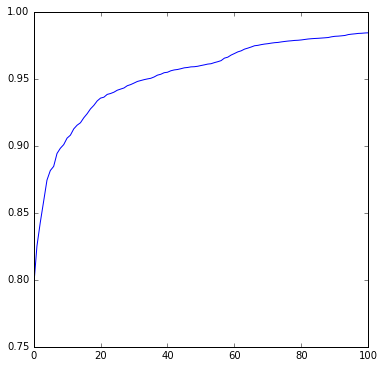

In [33]:
classes = np.unique(Ttest)
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)
print('Percent Correct: Training',100*np.sum(Ptrain==Ttrain)/len(Ttrain), 'Testing',100*np.sum(Ptest==Ttest)/len(Ttest))
print()
ml.printConfusionMatrix( ml.confusionMatrix(Ttest,Ptest,classes), classes )
print('1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stairs')
plt.plot(np.exp(-nnet.getErrorTrace()));

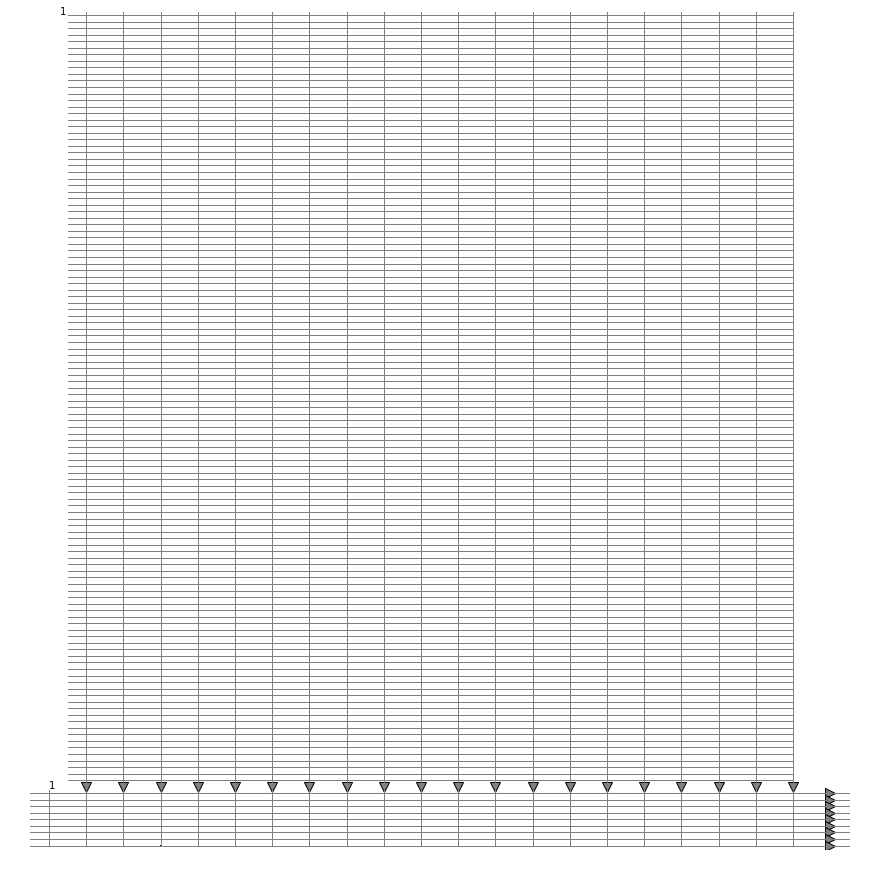

In [34]:
plt.figure(figsize=(15,15))
nnet.draw()

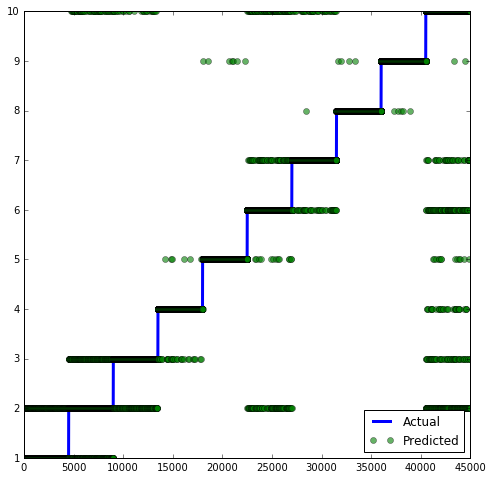

In [35]:
plt.figure(figsize=(8,8))
plt.plot(Ttest,lw=3)
plt.plot(Ptest,'o',alpha=0.6)
plt.legend(('Actual','Predicted'),loc='best');